In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Helper Functions

In [11]:
def plot_confusion_matrix(top_left, top_right, bottom_left, bottom_right, horizontal_label, vertical_label):
    array = [[top_left, top_right],
            [bottom_left, bottom_right]]
    array_df = pd.DataFrame(array, index=["pass", "fail"], columns=["pass", "fail"])
    sn.set(font_scale=1.6)
    h = sn.heatmap(array_df, annot=True, fmt='d')
    h.set_xlabel(horizontal_label)
    h.set_ylabel(vertical_label)

def write_tests_to_investigate(df, file_name):
    with open(f'/mnt/data/donald/pacsolve/slurm/test_results/{file_name}', 'w') as f:
        for name, row in df.iterrows():
            print("\n\n-----------------------------------\n\n", file=f)
            out = row.test_stdout.strip() if row.test_stdout is not None else None
            err = row.test_stderr.strip() if row.test_stderr is not None else None
            print(f"name = {name}\ntest_status = {row.test_status}\ntest_time = {row.test_time}\ntest_timeout = {row.test_timeout}\n\ntest_stdout =\n{out}\n\n\ntest_stderr = \n{err}", file=f)
    print(f"Saved test outputs to: /mnt/data/donald/pacsolve/slurm/test_results/{file_name}")

## Load Data

In [5]:
vanilla_df = pd.read_json('/mnt/data/donald/pacsolve/slurm/test_results/vanilla_top1000tarball_repos.json', orient='index')
vanilla_df.index.name = 'name'

minnpm_df = pd.read_json('/mnt/data/donald/pacsolve/slurm/test_results/minnpm_top1000tarball_repos_with_esm.json', orient='index')
minnpm_df.index.name = 'name'

In [6]:
vanilla_df

root  did_run_install  did_run_build  \
name                                                                       
body-parser.tgz     top1000tarball_repos             True          False   
diff.tgz            top1000tarball_repos             True          False   
leven.tgz           top1000tarball_repos             True          False   
is-bigint.tgz       top1000tarball_repos             True          False   
regex-not.tgz       top1000tarball_repos             True          False   
...                                  ...              ...            ...   
css-loader.tgz      top1000tarball_repos             True           True   
is-path-in-cwd.tgz  top1000tarball_repos             True          False   
acorn-globals.tgz   top1000tarball_repos             True          False   
ipaddr.js.tgz       top1000tarball_repos             True           True   
mime.tgz            top1000tarball_repos             True          False   

                    did_run_test  has_build_script  has_test_script  \
name                                                                  
body-parser.tgz             True             False             True   
diff.tgz                    True             False             True   
leven.tgz                   True             False             True   
is-bigint.tgz               True             False             True   
regex-not.tgz               True             False             True   
...                          ...               ...              ...   
css-loader.tgz              True              True             True   
is-path-in-cwd.tgz          True             False             True   
acorn-globals.tgz           True             False             True   
ipaddr.js.tgz               True              True             True   
mime.tgz                    True             False             True   

                    install_status  \
name                                 
body-parser.tgz                  0   
diff.tgz                         0   
leven.tgz                        0   
is-bigint.tgz                    0   
regex-not.tgz                    0   
...                            ...   
css-loader.tgz                   0   
is-path-in-cwd.tgz               0   
acorn-globals.tgz                0   
ipaddr.js.tgz                    0   
mime.tgz                         0   

                                                       install_stdout  \
name                                                                    
body-parser.tgz     \nadded 423 packages, and audited 424 packages...   
diff.tgz            \nadded 1336 packages, and audited 1337 packag...   
leven.tgz           \nadded 701 packages, and audited 702 packages...   
is-bigint.tgz       \nadded 310 packages, and audited 493 packages...   
regex-not.tgz       \nadded 183 packages, and audited 184 packages...   
...                                                               ...   
css-loader.tgz      \nadded 1212 packages, and audited 1213 packag...   
is-path-in-cwd.tgz  \nadded 813 packages, and audited 814 packages...   
acorn-globals.tgz   \nadded 16 packages, and audited 17 packages i...   
ipaddr.js.tgz       \nadded 136 packages, and audited 137 packages...   
mime.tgz            \nadded 318 packages, and audited 319 packages...   

                                                       install_stderr  \
name                                                                    
body-parser.tgz                                                         
diff.tgz            npm WARN deprecated urix@0.1.0: Please see htt...   
leven.tgz           npm WARN deprecated electron@0.4.1: The origin...   
is-bigint.tgz                                                           
regex-not.tgz       npm WARN deprecated source-map-url@0.4.1: See ...   
...                                                               ...   
css-loader.tgz      npm WARN deprecated source-map-resolve@0.6.0: ...   
is-path-in-cwd.tgz  n

## How many did we actually run tests on?

In [7]:
vanilla_ran = vanilla_df.did_run_test.sum()
minnpm_ran = minnpm_df.did_run_test.sum()
print(f"Vanilla ran {vanilla_ran} tests")
print(f"MinNPM ran {minnpm_ran} tests")

Vanilla ran 750 tests
MinNPM ran 736 tests


## How many tests passed (judged via exit code = 0)

In [8]:
vanilla_passed = (vanilla_df[vanilla_df.did_run_test].test_status == 0).sum()
minnpm_passed = (minnpm_df[minnpm_df.did_run_test].test_status == 0).sum()
print(f"Vanilla passed {vanilla_passed} tests ({vanilla_passed / vanilla_ran * 100}%)")
print(f"MinNPM passed {minnpm_passed} tests ({minnpm_passed / minnpm_ran * 100}%)")

Vanilla passed 613 tests (81.73333333333333%)
MinNPM passed 571 tests (77.58152173913044%)


## Comparing Passes / Fails with Vanilla and MinNPM

735 tests were ran by both Vanilla and MinNPM


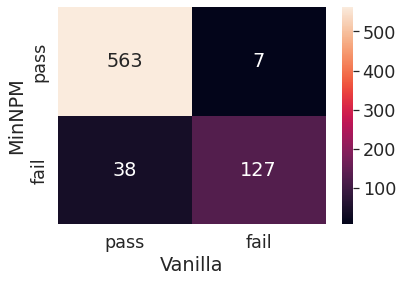

In [9]:
ran_by_both = vanilla_df.did_run_test & minnpm_df.did_run_test
ran_by_both_count = ran_by_both.sum()
print(f"{ran_by_both_count} tests were ran by both Vanilla and MinNPM")

vanilla_passes_minnpm_passes = ran_by_both & (vanilla_df.test_status == 0) & (minnpm_df.test_status == 0)
vanilla_fails_minnpm_passes = ran_by_both & (vanilla_df.test_status != 0) & (minnpm_df.test_status == 0)
vanilla_passes_minnpm_fails = ran_by_both & (vanilla_df.test_status == 0) & (minnpm_df.test_status != 0)
vanilla_fails_minnpm_fails = ran_by_both & (vanilla_df.test_status != 0) & (minnpm_df.test_status != 0)

plot_confusion_matrix(vanilla_passes_minnpm_passes.sum(), vanilla_fails_minnpm_passes.sum(), vanilla_passes_minnpm_fails.sum(), vanilla_fails_minnpm_fails.sum(), 'Vanilla', 'MinNPM')

## Tests that Passed with Vanilla and Failed with MinNPM

In [12]:
tests_to_investigate_df = minnpm_df[vanilla_passes_minnpm_fails][['test_status', 'test_stdout', 'test_stderr', 'test_time', 'test_timeout']]
write_tests_to_investigate(tests_to_investigate_df, 'tests_to_inspect.txt')
tests_to_investigate_df

Saved test outputs to: /mnt/data/donald/pacsolve/slurm/test_results/tests_to_inspect.txt


test_status  \
name                                                
parse-json.tgz                                1.0   
strip-ansi.tgz                                1.0   
aggregate-error.tgz                           1.0   
eslint-plugin-import.tgz                     66.0   
cli-cursor.tgz                                1.0   
wrap-ansi.tgz                                 1.0   
npm-run-path.tgz                              1.0   
p-locate.tgz                                  1.0   
onetime.tgz                                   1.0   
string-width.tgz                              1.0   
webpack-sources.tgz                           1.0   
espree.tgz                                    1.0   
parent-module.tgz                             1.0   
pkg-dir.tgz                                   NaN   
pkg-up.tgz                                    NaN   
string-length.tgz                             1.0   
redent.tgz                                    1.0   
widest-line.tgz                               1.0   
meow.tgz                                      1.0   
file-loader.tgz                               1.0   
postcss-modules-scope.tgz                     1.0   
ms.tgz                                        1.0   
test-exclude.tgz                              1.0   
has-ansi.tgz                                  1.0   
clean-stack.tgz                               1.0   
slice-ansi.tgz                                1.0   
sort-keys.tgz                                 1.0   
http-proxy-middleware.tgz                     1.0   
camelcase-keys.tgz                            1.0   
postcss-modules-local-by-default.tgz          1.0   
w3c-xmlserializer.tgz                         1.0   
boxen.tgz                                     1.0   
log-symbols.tgz                               1.0   
watchpack.tgz                                 1.0   
p-limit.tgz                                   1.0   
read-pkg-up.tgz                               1.0   
locate-path.tgz                               NaN   
is-path-in-cwd.tgz                            1.0   

                                                                            test_stdout  \
name                                                                                      
parse-json.tgz                           \n> parse-json@6.0.2 test\n> xo && nyc ava\n\n   
strip-ansi.tgz                        \n> strip-ansi@7.0.1 test\n> xo && ava && tsd\n\n   
aggregate-error.tgz                    \n> aggregate-error@4.0.1 test\n> ava && tsd\n\n   
eslint-plugin-import.tgz              \n> eslint-plugin-import@2.26.0 pretest\n> lin...   
cli-cursor.tgz                        \n> cli-cursor@4.0.0 test\n> xo && ava && tsd\n\n   
wrap-ansi.tgz                             \n> wrap-ansi@8.0.1 test\n> xo && nyc ava\n\n   
npm-run-path.tgz                      \n> npm-run-path@5.1.0 test\n> xo && ava && ts...   
p-locate.tgz                            \n> p-locate@6.0.0 test\n> xo && ava && tsd\n\n   
onetime.tgz                              \n> onetime@6.0.0 test\n> xo && ava && tsd\n\n   
string-width.tgz                      \n> string-width@5.1.2 test\n> xo && ava && ts...   
webpack-sources.tgz                   \n> webpack-sources@3.2.3 pretest\n> yarn lint...   
espree.tgz                            \n> espree@9.3.2 pretest\n> npm run build\n\n\...   
parent-module.tgz                     \n> parent-module@3.0.0 test\n> xo && ava && t...   
pkg-dir.tgz                                                                        None   
pkg-up.tgz                                                                         None   
string-length.tgz                     \n> string-length@5.0.1 test\n> xo && ava && t...   
redent.tgz                                \n> redent@4.0.0 test\n> xo && ava && tsd\n\n   
widest-line.tgz                       \n> widest-line@4.0.1 test\n> xo && ava && tsd...   
meow.tgz                                   \n> meow@10.1.3 test\n> xo && ava && tsd\n\n   
file-l

In [13]:
tests_to_investigate_df = vanilla_df[vanilla_fails_minnpm_passes][['test_status', 'test_stdout', 'test_stderr', 'test_time', 'test_timeout']]
write_tests_to_investigate(tests_to_investigate_df, 'tests_to_inspect2.txt')
tests_to_investigate_df

Saved test outputs to: /mnt/data/donald/pacsolve/slurm/test_results/tests_to_inspect2.txt


test_status  \
name                                    
neo-async.tgz                     1.0   
get-intrinsic.tgz                 1.0   
array.prototype.flat.tgz          1.0   
array-includes.tgz                1.0   
bl.tgz                            1.0   
call-bind.tgz                     1.0   
mimic-response.tgz                1.0   

                                                                test_stdout  \
name                                                                          
neo-async.tgz             \n> neo-async@2.6.2 test\n> istanbul cover ./n...   
get-intrinsic.tgz         \n> get-intrinsic@1.1.2 pretest\n> npm run lin...   
array.prototype.flat.tgz  \n> array.prototype.flat@1.3.0 pretest\n> npm ...   
array-includes.tgz        \n> array-includes@3.1.5 pretest\n> npm run --...   
bl.tgz                    \n> bl@5.0.0 test\n> npm run lint && node test...   
call-bind.tgz             \n> call-bind@1.0.2 pretest\n> npm run lint\n\...   
mimic-response.tgz        \n> mimic-response@4.0.0 test\n> xo && ava && ...   

                                                                test_stderr  \
name                                                                          
neo-async.tgz             error\nlog\ntest\n============================...   
get-intrinsic.tgz         evalmd info it worked if it ends with ok\neval...   
array.prototype.flat.tgz  evalmd info it worked if it ends with ok\neval...   
array-includes.tgz        evalmd info it worked if it ends with ok\neval...   
bl.tgz                    node:internal/fs/utils:344\n    throw err;\n  ...   
call-bind.tgz             evalmd info it worked if it ends with ok\neval...   
mimic-response.tgz                                                            

                          test_time  test_timeout  
name                                               
neo-async.tgz             35.753817           0.0  
get-intrinsic.tgz          0.774891           0.0  
array.prototype.flat.tgz   1.657289           0.0  
array-includes.tgz         0.791687           0.0  
bl.tgz                     3.949296           0.0  
call-bind.tgz              1.498611           0.0  
mimic-response.tgz         6.436579           0.0